Imports libraries and data

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

tolerance = 1e-6

data = pd.read_csv("data.csv")
inputs = data["x"]
actuals = data["y"]
x_max = (int(str(max(inputs)).replace("-", "")[0]) + 1) * (10 ** (len(str(max(inputs)).replace("-", "").split(".")[0]) - 1)) * (-1 if max(inputs) < 0 else 1)
x_min = (int(str(min(inputs)).replace("-", "")[0]) + (1 if min(inputs) < 0 else -1)) * (10 ** (len(str(min(inputs)).replace("-", "").split(".")[0]) - 1)) * (-1 if min(inputs) < 0 else 1)
y_max = (int(str(max(actuals)).replace("-", "")[0]) + 1) * (10 ** (len(str(max(actuals)).replace("-", "").split(".")[0]) - 1)) * (-1 if max(actuals) < 0 else 1)
y_min = (int(str(min(actuals)).replace("-", "")[0]) + (1 if min(actuals) < 0 else -1)) * (10 ** (len(str(min(actuals)).replace("-", "").split(".")[0]) - 1)) * (-1 if min(actuals) < 0 else 1)

Produces a linear regression model from data

In [87]:
def linear_regression_model():
    normalized_inputs = [(inputs[i] - min(inputs)) / (max(inputs) - min(inputs)) for i in range(len(inputs))]
    normalized_actuals = [(actuals[i] - min(actuals)) / (max(actuals) - min(actuals)) for i in range(len(actuals))]
    m_norm = 1
    b_norm = 0
    def func(x):
        return x * m_norm + b_norm
    learning_rate = 0.001
    for iter in range(100_000):
        count = 0
        for i in range(len(inputs)):
            error = normalized_actuals[i] - func(normalized_inputs[i])
            if error < tolerance and error > -1 * tolerance:
                count += 1
            m_norm += learning_rate * normalized_inputs[i] * error
            b_norm += learning_rate * error
        if count == len(normalized_inputs):
            break
    m = m_norm * ((max(actuals) - min(actuals)) / (max(inputs) - min(inputs)))
    b = (b_norm * (max(actuals) - min(actuals))) + min(actuals) - m_norm * min(inputs)
    print(f"Function: {m}x + {b}")
    return [m,b]

Graphs the data and line of best fit

Function: -0.0024062102576326203x + -3.9992614700327125


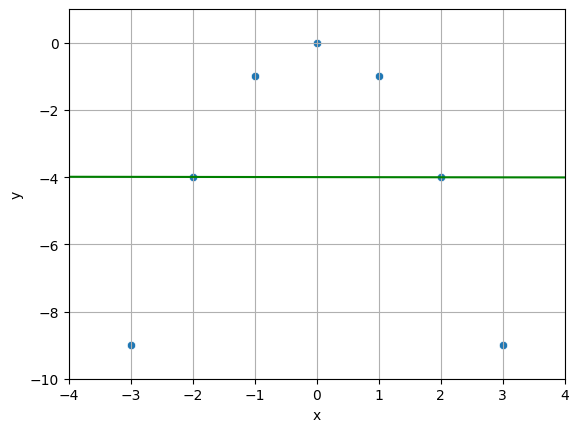

In [88]:
terms = linear_regression_model()
m = terms[0]
b = terms[1]

x = np.linspace(x_min, x_max, 100)
y = m * x + b

line_data = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(data=line_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.show()

Produces a quadratic regression model

In [89]:
def quadratic_regression_model():
    normalized_inputs = [(inputs[i] - min(inputs)) / (max(inputs) - min(inputs)) for i in range(len(inputs))]
    normalized_actuals = [(actuals[i] - min(actuals)) / (max(actuals) - min(actuals)) for i in range(len(actuals))]
    a_norm = 1
    b_norm = 0
    c_norm = 0

    def func(x):
        return a_norm * (x ** 2) + b_norm * x + c_norm

    learning_rate = 0.01
    for iter in range(1_000_000):
        count = 0
        for i in range(len(normalized_inputs)):
            error = normalized_actuals[i] - func(normalized_inputs[i])
            if error < tolerance and error < -1 * tolerance:
                count += 1
            a_norm += learning_rate * (normalized_inputs[i] ** 2) * error
            b_norm += learning_rate * normalized_inputs[i] * error
            c_norm += learning_rate * error
        if count == len(inputs):
            break

    a = (a_norm / ((max(inputs) - min(inputs)) ** 2)) * (max(actuals) - min(actuals))
    b = ((-2 * min(inputs) * a_norm) / ((max(inputs) - min(inputs)) ** 2) + (b_norm / (max(inputs) - min(inputs)))) * (max(actuals) - min(actuals))
    #c = ((((max(inputs) ** 2) * a_norm) / ((max(inputs) - min(inputs)) ** 2)) - (b_norm * min(inputs) / (max(inputs) - min(inputs))) + c_norm) * (max(actuals) - min(actuals)) + min(actuals)
    c = c_norm * (max(actuals) - min(actuals)) + min(actuals) - a * min(inputs) ** 2 - b * min(inputs)
    print(f"Function {a}x^2 + {b}x + {c}")
    return [a,b,c]

Graphs a quadratic best fit model

Function -0.9999999999999216x^2 + -6.59472476627343e-14x + -3.079758670310184e-13


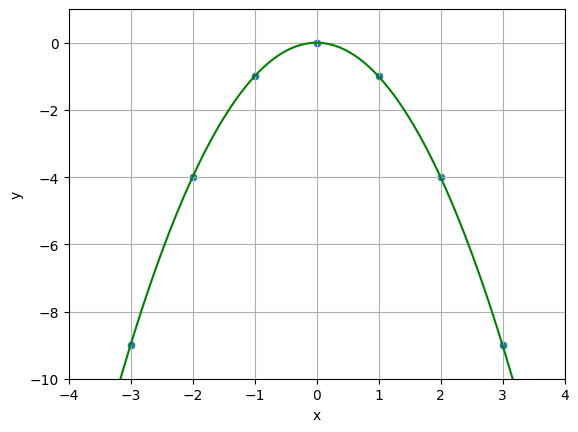

In [90]:
terms = quadratic_regression_model()
a = terms[0]
b = terms[1]
c = terms[2]

x = np.linspace(x_min, x_max, 100)
y = a * (x ** 2) + b * x + c

quad_data = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(data=quad_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.show()

Produces and exponential best fit model

In [91]:
def exponential_regression_model():
    a = 1.0
    b = 2.0

    def func(x):
        return a * (b ** x)

    learning_rate = 0.001 / abs(max(inputs))
    for iter in range(100_000):
        count = 0
        for i in range(len(inputs)):
            error = actuals[i] - func(inputs[i])
            if error < tolerance and error > -1 * tolerance:
                count += 1
            a0 = a
            a += (b ** inputs[i]) * learning_rate * error
            b += a0 * ((b ** (inputs[i] - 1)) * inputs[i]) * learning_rate * error
        if count == len(inputs):
            break
    print(f"function: {a} * ({b})^x")
    return [a,b]

Graphs the exponential best fit model

function: -3.9777759858067303 * (1.0388368108823476)^x


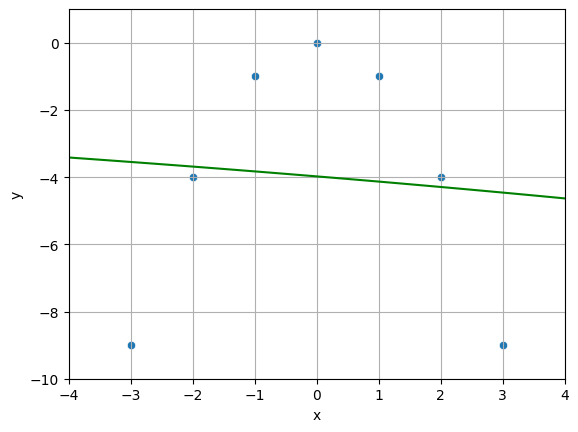

In [92]:
terms = exponential_regression_model()
a = terms[0]
b = terms[1]

x = np.linspace(x_min, x_max, 100)
y = a * (b ** x)

exp_data = pd.DataFrame({"x": x, "y": y})
sns.lineplot(data=exp_data, x="x", y="y", color="green")
sns.scatterplot(data=data, x="x", y="y")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.show()